# 04: Visualizations

Generate charts and visualizations for the analysis.


In [1]:
import sys
from pathlib import Path

# Add src to path - robust path resolution for notebooks
# In Jupyter, cwd is usually the project root, not notebooks/
current_dir = Path.cwd()

# Check if we're in notebooks/ directory or at project root
if current_dir.name == 'notebooks':
    project_root = current_dir.parent
elif (current_dir / 'config.yml').exists():
    # We're already at project root
    project_root = current_dir
else:
    # Try to find project root by looking for config.yml
    project_root = current_dir
    while project_root != project_root.parent:
        if (project_root / 'config.yml').exists():
            break
        project_root = project_root.parent

sys.path.insert(0, str(project_root))

import pandas as pd
import matplotlib.pyplot as plt
from src.viz.plots import (
    plot_cumulative_returns,
    plot_drawdown,
    plot_rolling_metric,
    plot_rolling_alpha_beta,
    plot_rolling_metrics_comparison,
    plot_correlation_matrix,
)
from src.analytics.performance_metrics import calculate_rolling_sharpe
from src.analytics.risk import calculate_drawdown_series
from src.analytics.regression import calculate_rolling_alpha_beta
from src.utils.paths import get_data_interim_path


In [2]:
# Load data
interim_path = get_data_interim_path()
returns_df = pd.read_csv(interim_path / "returns_merged.csv", parse_dates=["date"])
returns_df = returns_df.set_index("date")

varbx_returns = returns_df["return_varbx"]
sp500_returns = returns_df["return_sp500"]
hfri_ed_returns = returns_df["return_hfri_ed"]


## Cumulative Returns


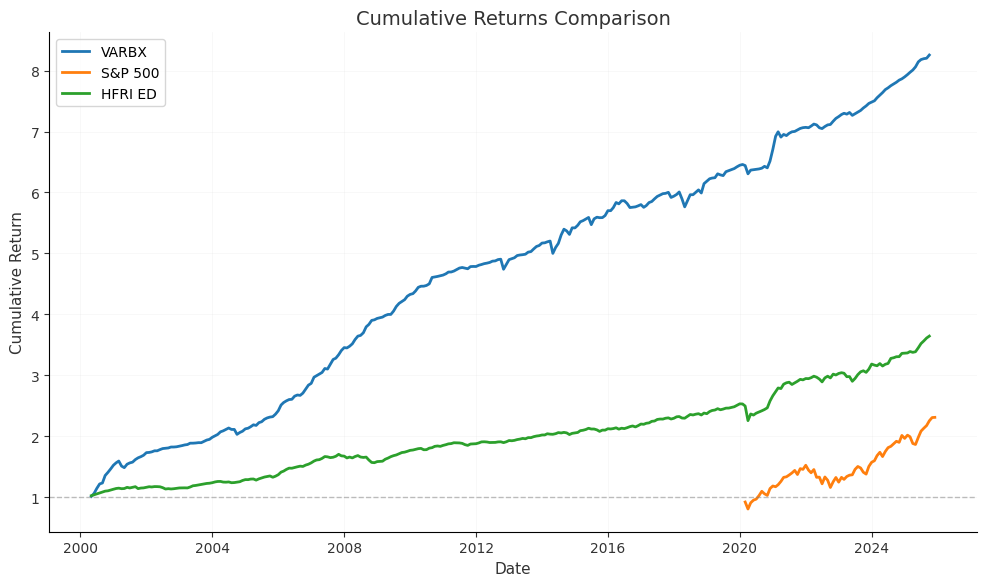

In [3]:
# Plot cumulative returns
returns_dict = {
    "VARBX": varbx_returns,
    "S&P 500": sp500_returns,
    "HFRI ED": hfri_ed_returns
}
fig = plot_cumulative_returns(returns_dict, title="Cumulative Returns Comparison")
plt.show()


## Drawdown Chart


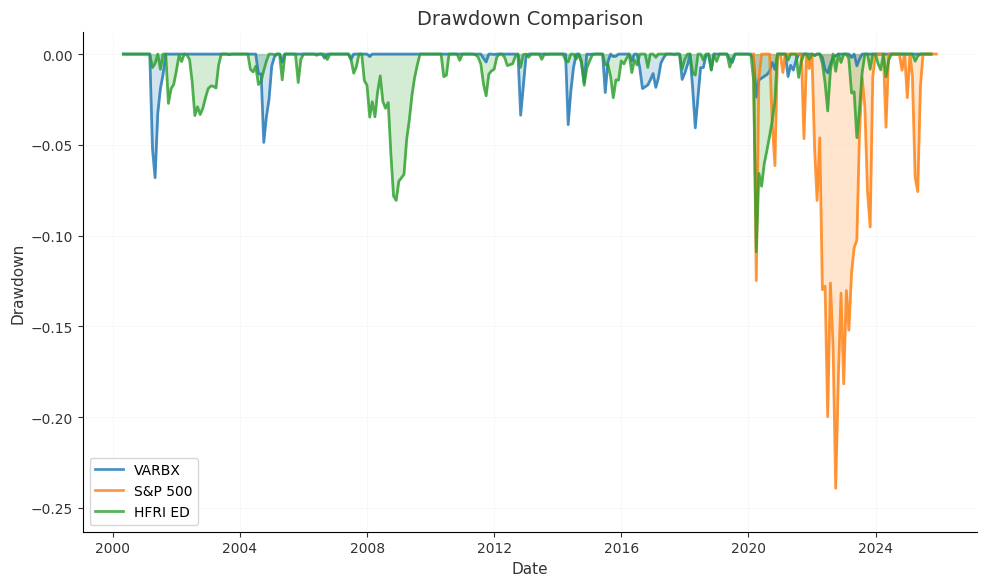

In [4]:
# Plot drawdown for all three assets
varbx_drawdown = calculate_drawdown_series(varbx_returns)
sp500_drawdown = calculate_drawdown_series(sp500_returns)
hfri_ed_drawdown = calculate_drawdown_series(hfri_ed_returns)

drawdown_dict = {
    "VARBX": varbx_drawdown,
    "S&P 500": sp500_drawdown,
    "HFRI ED": hfri_ed_drawdown
}
fig = plot_drawdown(drawdown_dict, title="Drawdown Comparison")
plt.show()


## Rolling Metrics


## Rolling Alpha and Beta Comparisons


## Alpha Comparison: Strategy vs Market Benchmark


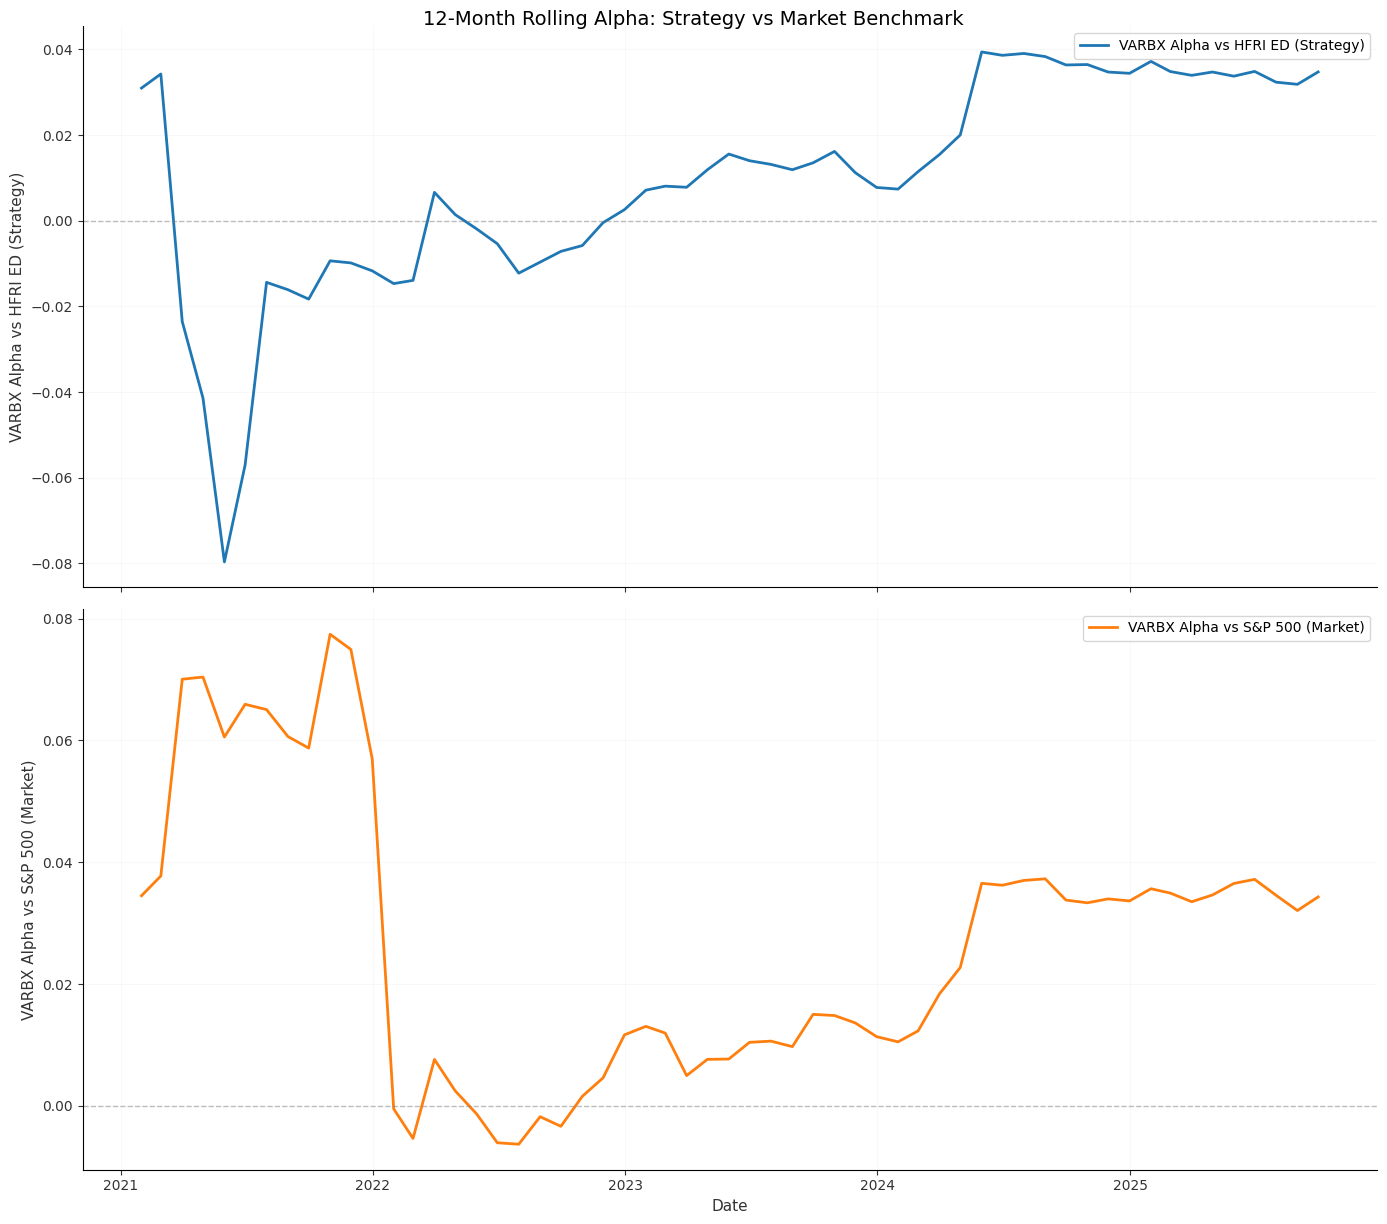

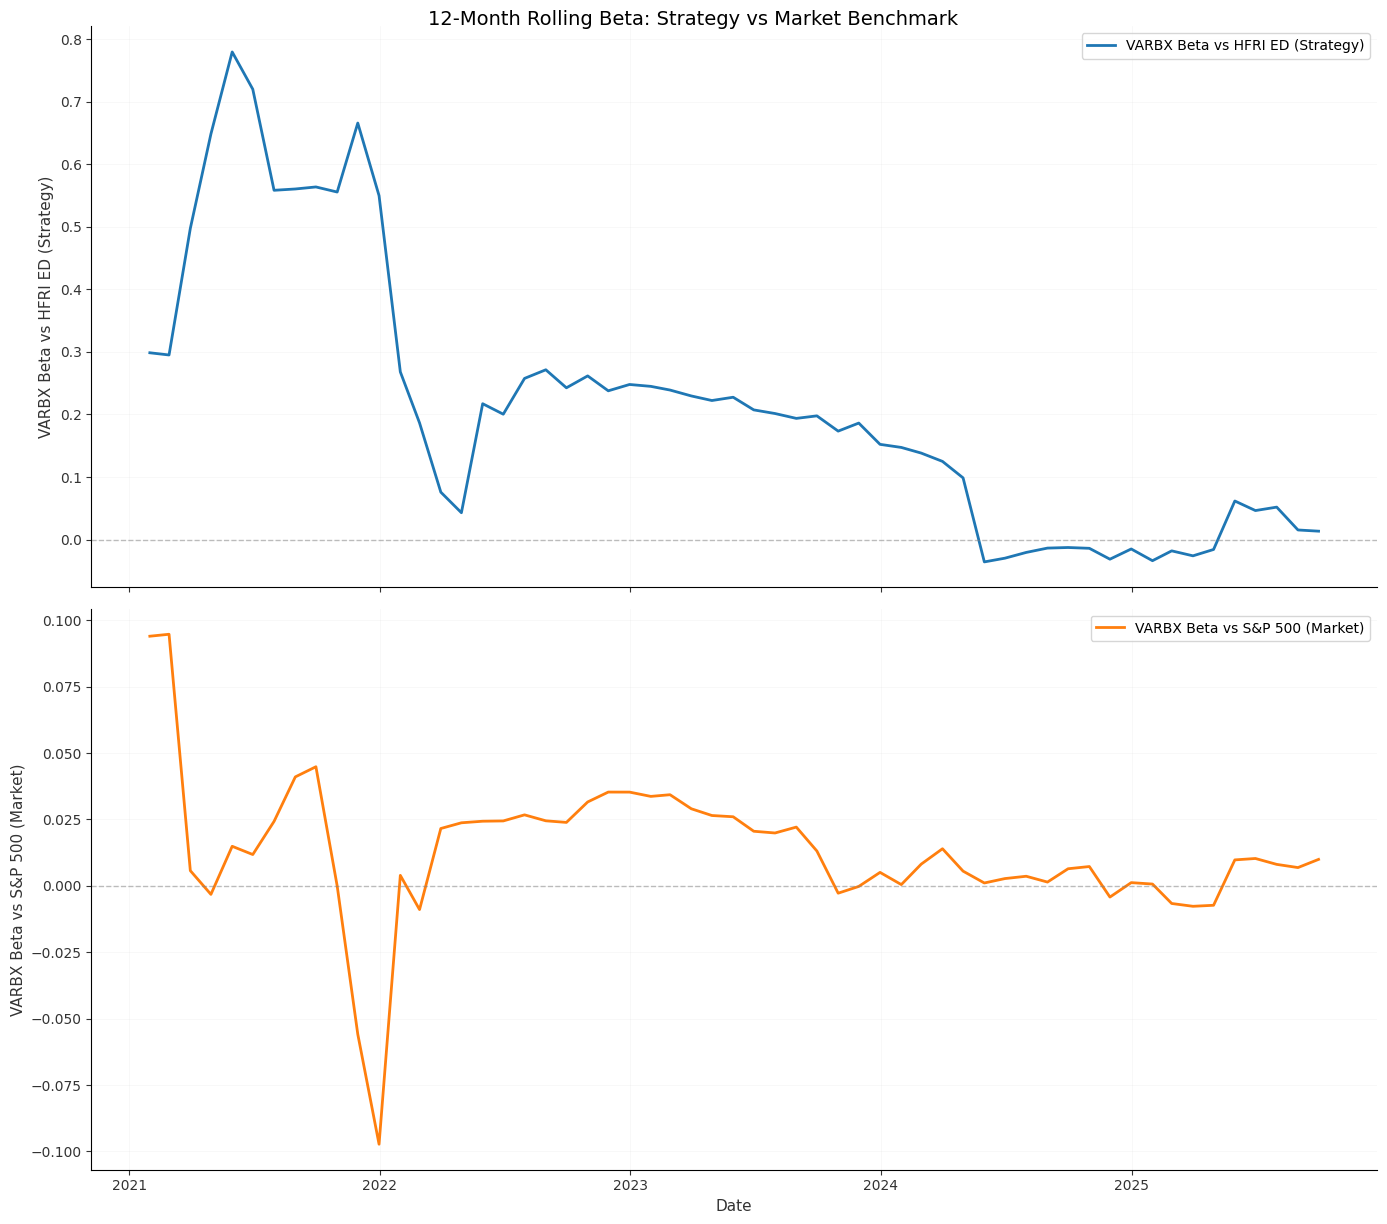

In [5]:
# Compare rolling alpha for VARBX vs both benchmarks side by side
window = 12

# Calculate rolling alpha/beta for both benchmarks
rolling_ab_hfri = calculate_rolling_alpha_beta(
    varbx_returns,
    hfri_ed_returns,
    window=window
)

common_dates_varbx_sp500 = varbx_returns.index.intersection(sp500_returns.index)
varbx_aligned = varbx_returns.loc[common_dates_varbx_sp500]
sp500_aligned = sp500_returns.loc[common_dates_varbx_sp500]

rolling_ab_sp500 = calculate_rolling_alpha_beta(
    varbx_aligned,
    sp500_aligned,
    window=window
)

# Align by common dates for comparison
if len(rolling_ab_hfri) > 0 and len(rolling_ab_sp500) > 0:
    common_alpha_dates = rolling_ab_hfri.index.intersection(rolling_ab_sp500.index)
    if len(common_alpha_dates) > 0:
        # Plot rolling alpha comparison
        alpha_comparison_dict = {
            "VARBX Alpha vs HFRI ED (Strategy)": rolling_ab_hfri.loc[common_alpha_dates]["alpha_annualized"],
            "VARBX Alpha vs S&P 500 (Market)": rolling_ab_sp500.loc[common_alpha_dates]["alpha_annualized"]
        }
        fig = plot_rolling_metrics_comparison(alpha_comparison_dict, title=f"{window}-Month Rolling Alpha: Strategy vs Market Benchmark")
        plt.show()
        
        # Plot rolling beta comparison
        beta_comparison_dict = {
            "VARBX Beta vs HFRI ED (Strategy)": rolling_ab_hfri.loc[common_alpha_dates]["beta"],
            "VARBX Beta vs S&P 500 (Market)": rolling_ab_sp500.loc[common_alpha_dates]["beta"]
        }
        fig = plot_rolling_metrics_comparison(beta_comparison_dict, title=f"{window}-Month Rolling Beta: Strategy vs Market Benchmark")
        plt.show()


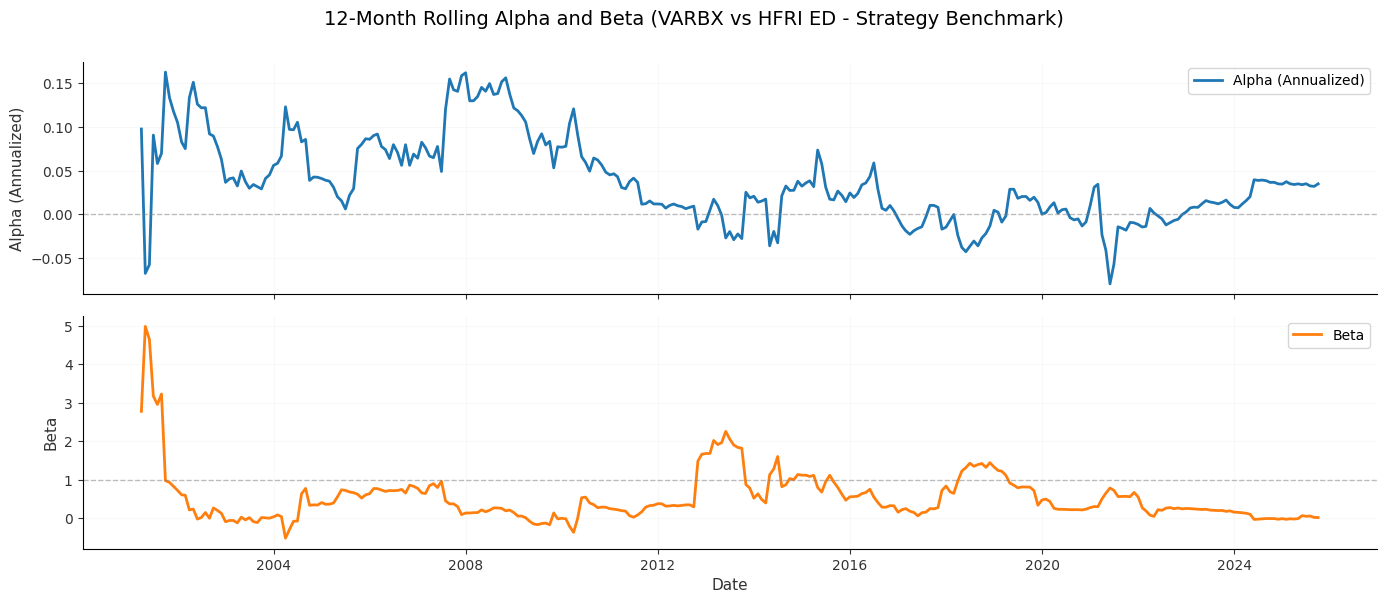

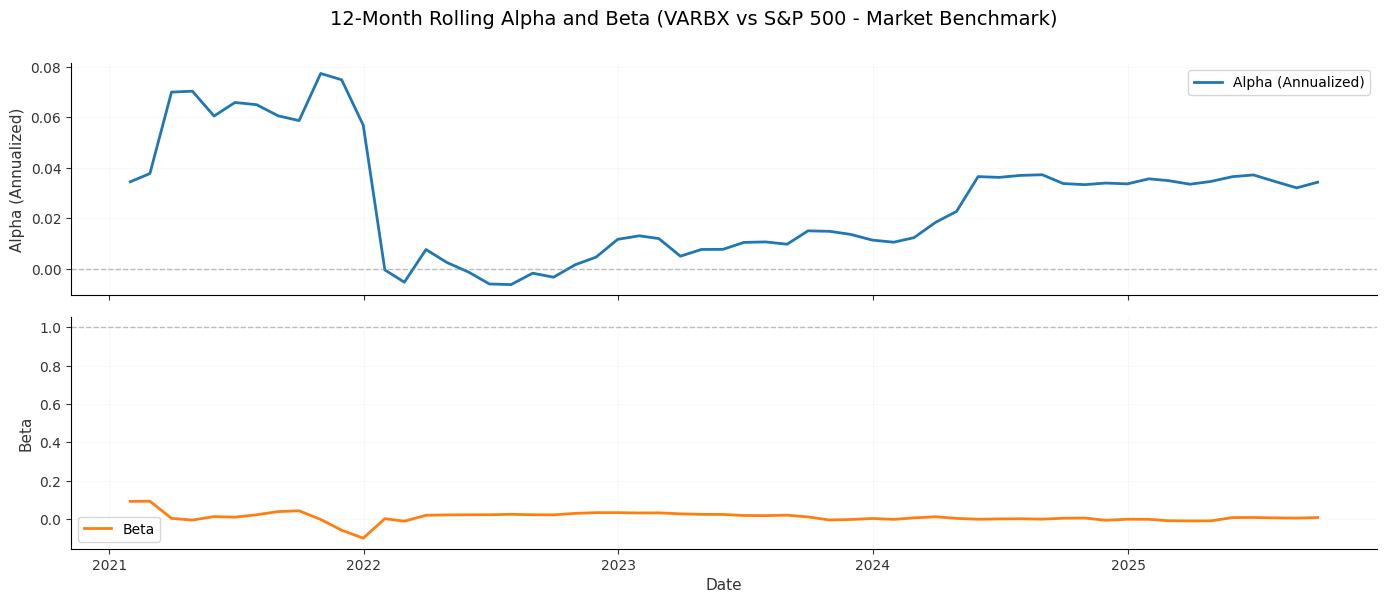

In [6]:
# Plot rolling alpha and beta: VARBX vs HFRI ED (Strategy Benchmark)
window = 12
rolling_ab_hfri = calculate_rolling_alpha_beta(
    varbx_returns,
    hfri_ed_returns,
    window=window
)
if len(rolling_ab_hfri) > 0:
    fig = plot_rolling_alpha_beta(rolling_ab_hfri, title=f"{window}-Month Rolling Alpha and Beta (VARBX vs HFRI ED - Strategy Benchmark)")
    plt.show()

# Plot rolling alpha and beta: VARBX vs S&P 500 (Market Benchmark)
# Align to common dates
common_dates_varbx_sp500 = varbx_returns.index.intersection(sp500_returns.index)
varbx_aligned = varbx_returns.loc[common_dates_varbx_sp500]
sp500_aligned = sp500_returns.loc[common_dates_varbx_sp500]

rolling_ab_sp500 = calculate_rolling_alpha_beta(
    varbx_aligned,
    sp500_aligned,
    window=window
)
if len(rolling_ab_sp500) > 0:
    fig = plot_rolling_alpha_beta(rolling_ab_sp500, title=f"{window}-Month Rolling Alpha and Beta (VARBX vs S&P 500 - Market Benchmark)")
    plt.show()


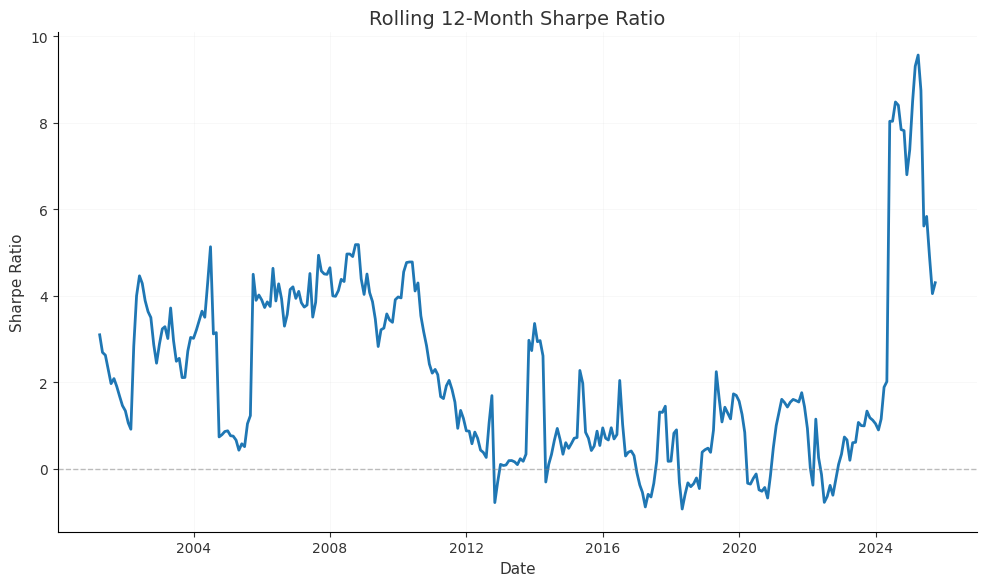

In [7]:
# Plot rolling Sharpe ratio
rolling_sharpe = calculate_rolling_sharpe(varbx_returns, window=12)
fig = plot_rolling_metric(
    rolling_sharpe,
    title="Rolling 12-Month Sharpe Ratio",
    ylabel="Sharpe Ratio"
)
plt.show()


## Correlation Matrix


## HFRI ED vs S&P 500 Comparison


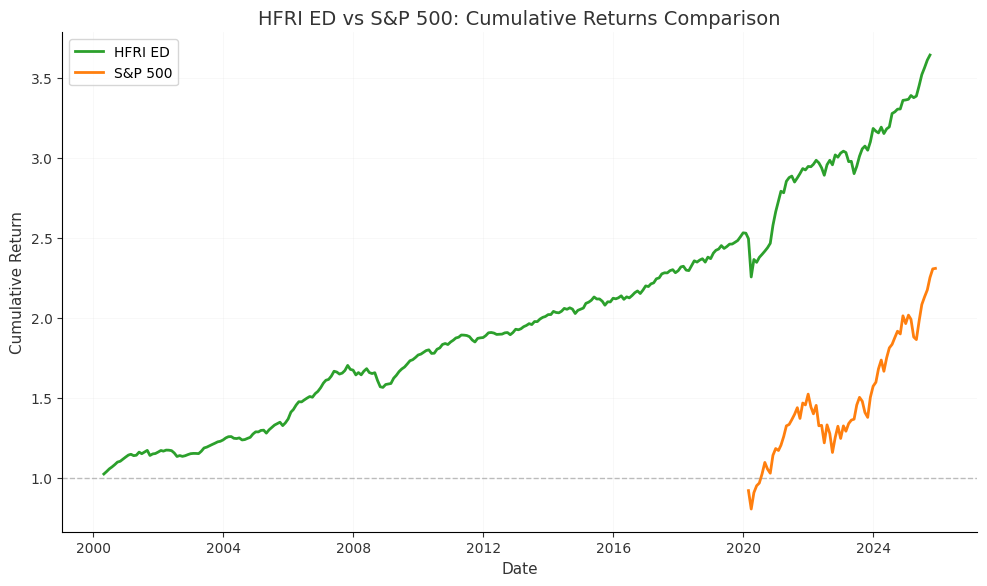

In [8]:
# Plot cumulative returns comparison: HFRI ED vs S&P 500
# Align the series to common dates
common_dates = hfri_ed_returns.index.intersection(sp500_returns.index)
hfri_ed_aligned = hfri_ed_returns.loc[common_dates]
sp500_aligned = sp500_returns.loc[common_dates]

hfri_sp500_dict = {
    "HFRI ED": hfri_ed_aligned,
    "S&P 500": sp500_aligned
}
fig = plot_cumulative_returns(hfri_sp500_dict, title="HFRI ED vs S&P 500: Cumulative Returns Comparison")
plt.show()


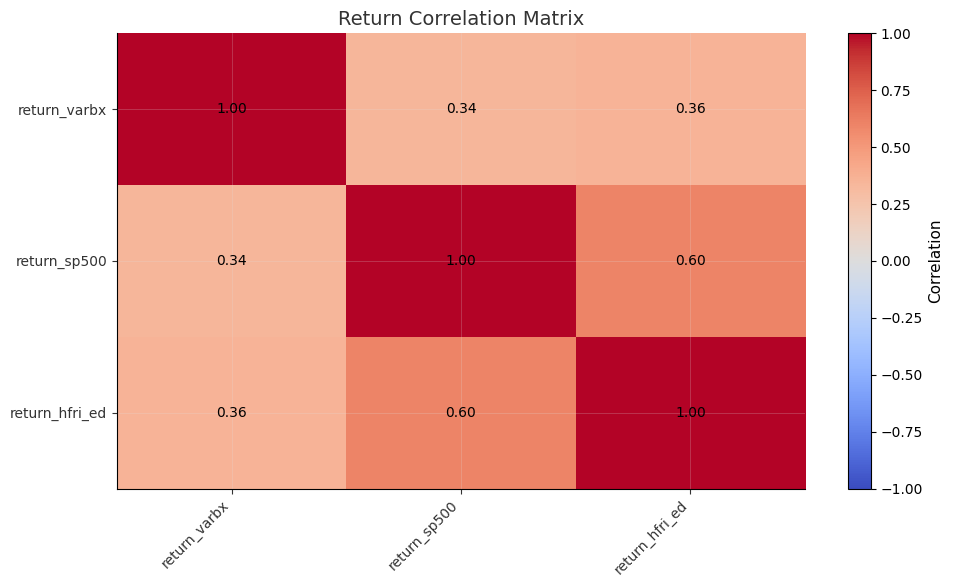

In [9]:
# Plot correlation matrix
returns_only = returns_df[["return_varbx", "return_sp500", "return_hfri_ed"]]
fig = plot_correlation_matrix(returns_only, title="Return Correlation Matrix")
plt.show()
